In [ ]:
#convolutional autoencoder trained with sdss images
#inspiration from https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from matplotlib import pyplot as plt

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
input_img = Input(shape=(28, 28, 1))

In [ ]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [2]:
print(K.int_shape(encoded))

(None, 4, 4, 8)


In [3]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
import random
import h5py
import numpy as np

In [5]:
####BEGIN IMPORTING GAL<STAR<QSO DATA 
#load data from data_path
#our data here is normalized 28x28 images of Stars, QSOs and Galaxies
data_path='./reform.hdf5'
#get total amount of images in count
count=0
#image shapes
data_shape=(0,0)
with h5py.File(data_path, 'r') as f:
    for group in f:
        for data in f.get(group).__iter__():
            #if int(data)>maxval: maxval=int(data)
            #if np.mean(f.get(group).get(data))<cutoff:
            if count<1:
                data_shape=f.get(group).get(data).shape
            count+=1
#save width and height of read-in images to use later
width=data_shape[0]
height=data_shape[1]
original_dim=width*height
#format to keep iamge types and data accounted for together: array of dic(type,data)
#we will use this to make our train and test data
images_temp=[dict() for x in range(count)]
#fill images_temp with data and data_types in each dict entry
index=0
with h5py.File(data_path, 'r') as f:
    for object_type in f:
        for data in f.get(object_type):
            #if np.mean(f.get(group).get(data))<cutoff:
            dat=f.get(object_type).get(data)
            #train_images[index]=dat
            #if object_type=='GALAXY':o_type=0
            #if object_type=='QSO':o_type=1
            #if object_type=='STAR':o_type=2
            images_temp[index]=np.array(dat)#{'type':o_type,'data':np.array(dat)}
            index+=1
assert(index==count)
#now shuffle dict array to enhance nn training
random.shuffle(images_temp)
#decide size of our test data, just taking test_size last images of images_temp
#set x_train,y_train,x_test,y_test
#x is image data, y is data type
test_size=9000
upper=count
lower=count-test_size
x_train=np.array([images_temp[:lower]]).reshape(lower,width,height,1)
x_test=np.array([images_temp[lower:]]).reshape(test_size,width,height,1)


In [6]:
x_test.shape

(9000, 28, 28, 1)

In [7]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=5000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder_sdss_05')])

Instructions for updating:
Use tf.cast instead.
Train on 45436 samples, validate on 9000 samples
Epoch 1/5000
45436/45436 [==============================] - 17s 385us/step - loss: 0.2615 - val_loss: 0.2276
Epoch 2/5000
45436/45436 [==============================] - 18s 389us/step - loss: 0.2242 - val_loss: 0.2230
Epoch 3/5000
45436/45436 [==============================] - 17s 383us/step - loss: 0.2214 - val_loss: 0.2209
Epoch 4/5000
45436/45436 [==============================] - 17s 376us/step - loss: 0.2199 - val_loss: 0.2215
Epoch 5/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2192 - val_loss: 0.2200
Epoch 6/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2187 - val_loss: 0.2197
Epoch 7/5000
45436/45436 [==============================] - 17s 373us/step - loss: 0.2184 - val_loss: 0.2198
Epoch 8/5000
45436/45436 [==============================] - 17s 371us/step - loss: 0.2181 - val_loss: 0.2183
Epoch 9/5000
45436/45436 [=====

45436/45436 [==============================] - 17s 364us/step - loss: 0.2144 - val_loss: 0.2154
Epoch 147/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2144 - val_loss: 0.2154
Epoch 148/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2144 - val_loss: 0.2153
Epoch 149/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2144 - val_loss: 0.2154
Epoch 150/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2144 - val_loss: 0.2153
Epoch 151/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2144 - val_loss: 0.2153
Epoch 152/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2144 - val_loss: 0.2154
Epoch 153/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2144 - val_loss: 0.2155
Epoch 154/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2144 - val_loss: 0.2153
Epoch 155/5000
4

Epoch 220/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2142 - val_loss: 0.2151
Epoch 221/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 222/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 223/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 224/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 225/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 226/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 227/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2142 - val_loss: 0.2152
Epoch 228/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2142 - val_loss: 0.2151
E

Epoch 294/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2141 - val_loss: 0.2151
Epoch 295/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2141 - val_loss: 0.2151
Epoch 296/5000
45436/45436 [==============================] - 17s 371us/step - loss: 0.2141 - val_loss: 0.2151
Epoch 297/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2141 - val_loss: 0.2151
Epoch 298/5000
45436/45436 [==============================] - 17s 370us/step - loss: 0.2141 - val_loss: 0.2151
Epoch 299/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2141 - val_loss: 0.2150
Epoch 300/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2141 - val_loss: 0.2150
Epoch 301/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2141 - val_loss: 0.2151
Epoch 302/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2141 - val_loss: 0.2151
E

Epoch 368/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 369/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 370/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 371/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2140 - val_loss: 0.2151
Epoch 372/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 373/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 374/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 375/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2140 - val_loss: 0.2151
Epoch 376/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2140 - val_loss: 0.2150
E

Epoch 442/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 443/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 444/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 445/5000
45436/45436 [==============================] - 16s 360us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 446/5000
45436/45436 [==============================] - 16s 360us/step - loss: 0.2140 - val_loss: 0.2149
Epoch 447/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2140 - val_loss: 0.2149
Epoch 448/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 449/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2140 - val_loss: 0.2149
Epoch 450/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2140 - val_loss: 0.2150
E

Epoch 516/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 517/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2140 - val_loss: 0.2150
Epoch 518/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 519/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 520/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 521/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 522/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2140 - val_loss: 0.2149
Epoch 523/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 524/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2139 - val_loss: 0.2149
E

Epoch 590/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 591/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 592/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 593/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 594/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 595/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 596/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 597/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2139 - val_loss: 0.2148
Epoch 598/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
E

Epoch 664/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 665/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 666/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 667/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 668/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 669/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2139 - val_loss: 0.2148
Epoch 670/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 671/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 672/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2139 - val_loss: 0.2149
E

Epoch 738/5000
45436/45436 [==============================] - 17s 370us/step - loss: 0.2139 - val_loss: 0.2148
Epoch 739/5000
45436/45436 [==============================] - 17s 370us/step - loss: 0.2139 - val_loss: 0.2148
Epoch 740/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2139 - val_loss: 0.2149
Epoch 741/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2149
Epoch 742/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 743/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 744/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 745/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 746/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
E

Epoch 812/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 813/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 814/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 815/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2149
Epoch 816/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 817/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 818/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 819/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 820/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
E

Epoch 886/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 887/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 888/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 889/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 890/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 891/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 892/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 893/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 894/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
E

Epoch 960/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 961/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 962/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 963/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 964/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 965/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 966/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 967/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 968/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2138 - val_loss: 0.2148
E

45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1107/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1108/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1109/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1110/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1111/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 1112/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1113/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 1114/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 11

45436/45436 [==============================] - 17s 366us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 1253/5000
45436/45436 [==============================] - 17s 370us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 1254/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 1255/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1256/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1257/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 1258/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1259/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2148
Epoch 1260/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2138 - val_loss: 0.2147
Epoch 12

45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1399/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1400/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1401/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1402/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2148
Epoch 1403/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2148
Epoch 1404/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2148
Epoch 1405/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1406/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2148
Epoch 14

45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1545/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1546/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1547/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2148
Epoch 1548/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1549/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1550/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1551/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1552/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 15

45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1691/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1692/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1693/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1694/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1695/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1696/5000
45436/45436 [==============================] - 17s 370us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1697/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1698/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2148
Epoch 16

45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1837/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1838/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1839/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1840/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1841/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1842/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1843/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1844/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 18

45436/45436 [==============================] - 16s 360us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1983/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1984/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 1985/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1986/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1987/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1988/5000
45436/45436 [==============================] - 16s 360us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 1989/5000
45436/45436 [==============================] - 16s 361us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 1990/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 19

45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2129/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2130/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2131/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2132/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2133/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2134/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2135/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2136/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 21

45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2275/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2276/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2277/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2278/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2279/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2280/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2281/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2282/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 22

45436/45436 [==============================] - 17s 364us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2421/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2422/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2423/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2424/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2425/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2147
Epoch 2426/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2427/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2428/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 24

45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2147
Epoch 2567/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2147
Epoch 2568/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2569/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2570/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2571/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2572/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2573/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2574/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 25

45436/45436 [==============================] - 17s 364us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2713/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2714/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2137 - val_loss: 0.2147
Epoch 2715/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2716/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2717/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2718/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2719/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2720/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 27

45436/45436 [==============================] - 17s 370us/step - loss: 0.2137 - val_loss: 0.2146
Epoch 2859/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2860/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2861/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2862/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2863/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2864/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2865/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 2866/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 28

45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3005/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2147
Epoch 3006/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3007/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3008/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3009/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3010/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3011/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3012/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 30

45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3151/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3152/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3153/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3154/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3155/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3156/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3157/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3158/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 31

45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3297/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3298/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3299/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3300/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3301/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3302/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3303/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3304/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 33

45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3443/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3444/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3445/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3446/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2147
Epoch 3447/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3448/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3449/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3450/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 34

45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3589/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3590/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3591/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3592/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3593/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2147
Epoch 3594/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3595/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3596/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 35

45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3735/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3736/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3737/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3738/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3739/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3740/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3741/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3742/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 37

45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3881/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3882/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3883/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3884/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3885/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3886/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3887/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 3888/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 38

45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4027/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4028/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4029/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4030/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4031/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4032/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4033/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4034/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 40

45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4173/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4174/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4175/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4176/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4177/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4178/5000
45436/45436 [==============================] - 16s 362us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4179/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4180/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 41

45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4319/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4320/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4321/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4322/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4323/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4324/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4325/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4326/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 43

45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4465/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4466/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4467/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4468/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4469/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4470/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4471/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4472/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 44

45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4611/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4612/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4613/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4614/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4615/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4616/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4617/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4618/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 46

45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4757/5000
45436/45436 [==============================] - 17s 365us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4758/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4759/5000
45436/45436 [==============================] - 17s 373us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4760/5000
45436/45436 [==============================] - 16s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4761/5000
45436/45436 [==============================] - 17s 363us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4762/5000
45436/45436 [==============================] - 17s 364us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4763/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4764/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 47

45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4903/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4904/5000
45436/45436 [==============================] - 17s 366us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4905/5000
45436/45436 [==============================] - 17s 370us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4906/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4907/5000
45436/45436 [==============================] - 17s 369us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4908/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 4909/5000
45436/45436 [==============================] - 17s 368us/step - loss: 0.2136 - val_loss: 0.2145
Epoch 4910/5000
45436/45436 [==============================] - 17s 367us/step - loss: 0.2136 - val_loss: 0.2146
Epoch 49

In [120]:
x_test.shape

(9000, 28, 28, 1)

In [27]:
import math

In [43]:
#img array to fill for print_squares_images
imgs=np.empty([25,width,height])
indxs=np.empty(25)

In [112]:
maxi=0
for i in x_test:
    if np.mean(i)>maxi:maxi=np.mean(i)
print(maxi)

0.19975136332845547


In [115]:
k=int(0)
i=int(0)
while i<25:
    if np.mean(x_test[k])>0.196:
        imgs[i]=x_test[k].reshape(28,28)
        indxs[i]=k
        i+=1
    k+=1

In [116]:
indxs

array([ 184.,  297.,  308.,  351.,  377., 2092., 2339., 3438., 3757.,
       4163., 4255., 4353., 5143., 5401., 5598., 5607., 5673., 5801.,
       5936., 6469., 6576., 6686., 6844., 7107., 8667.])

In [257]:
inxs=np.array([4,14,17])

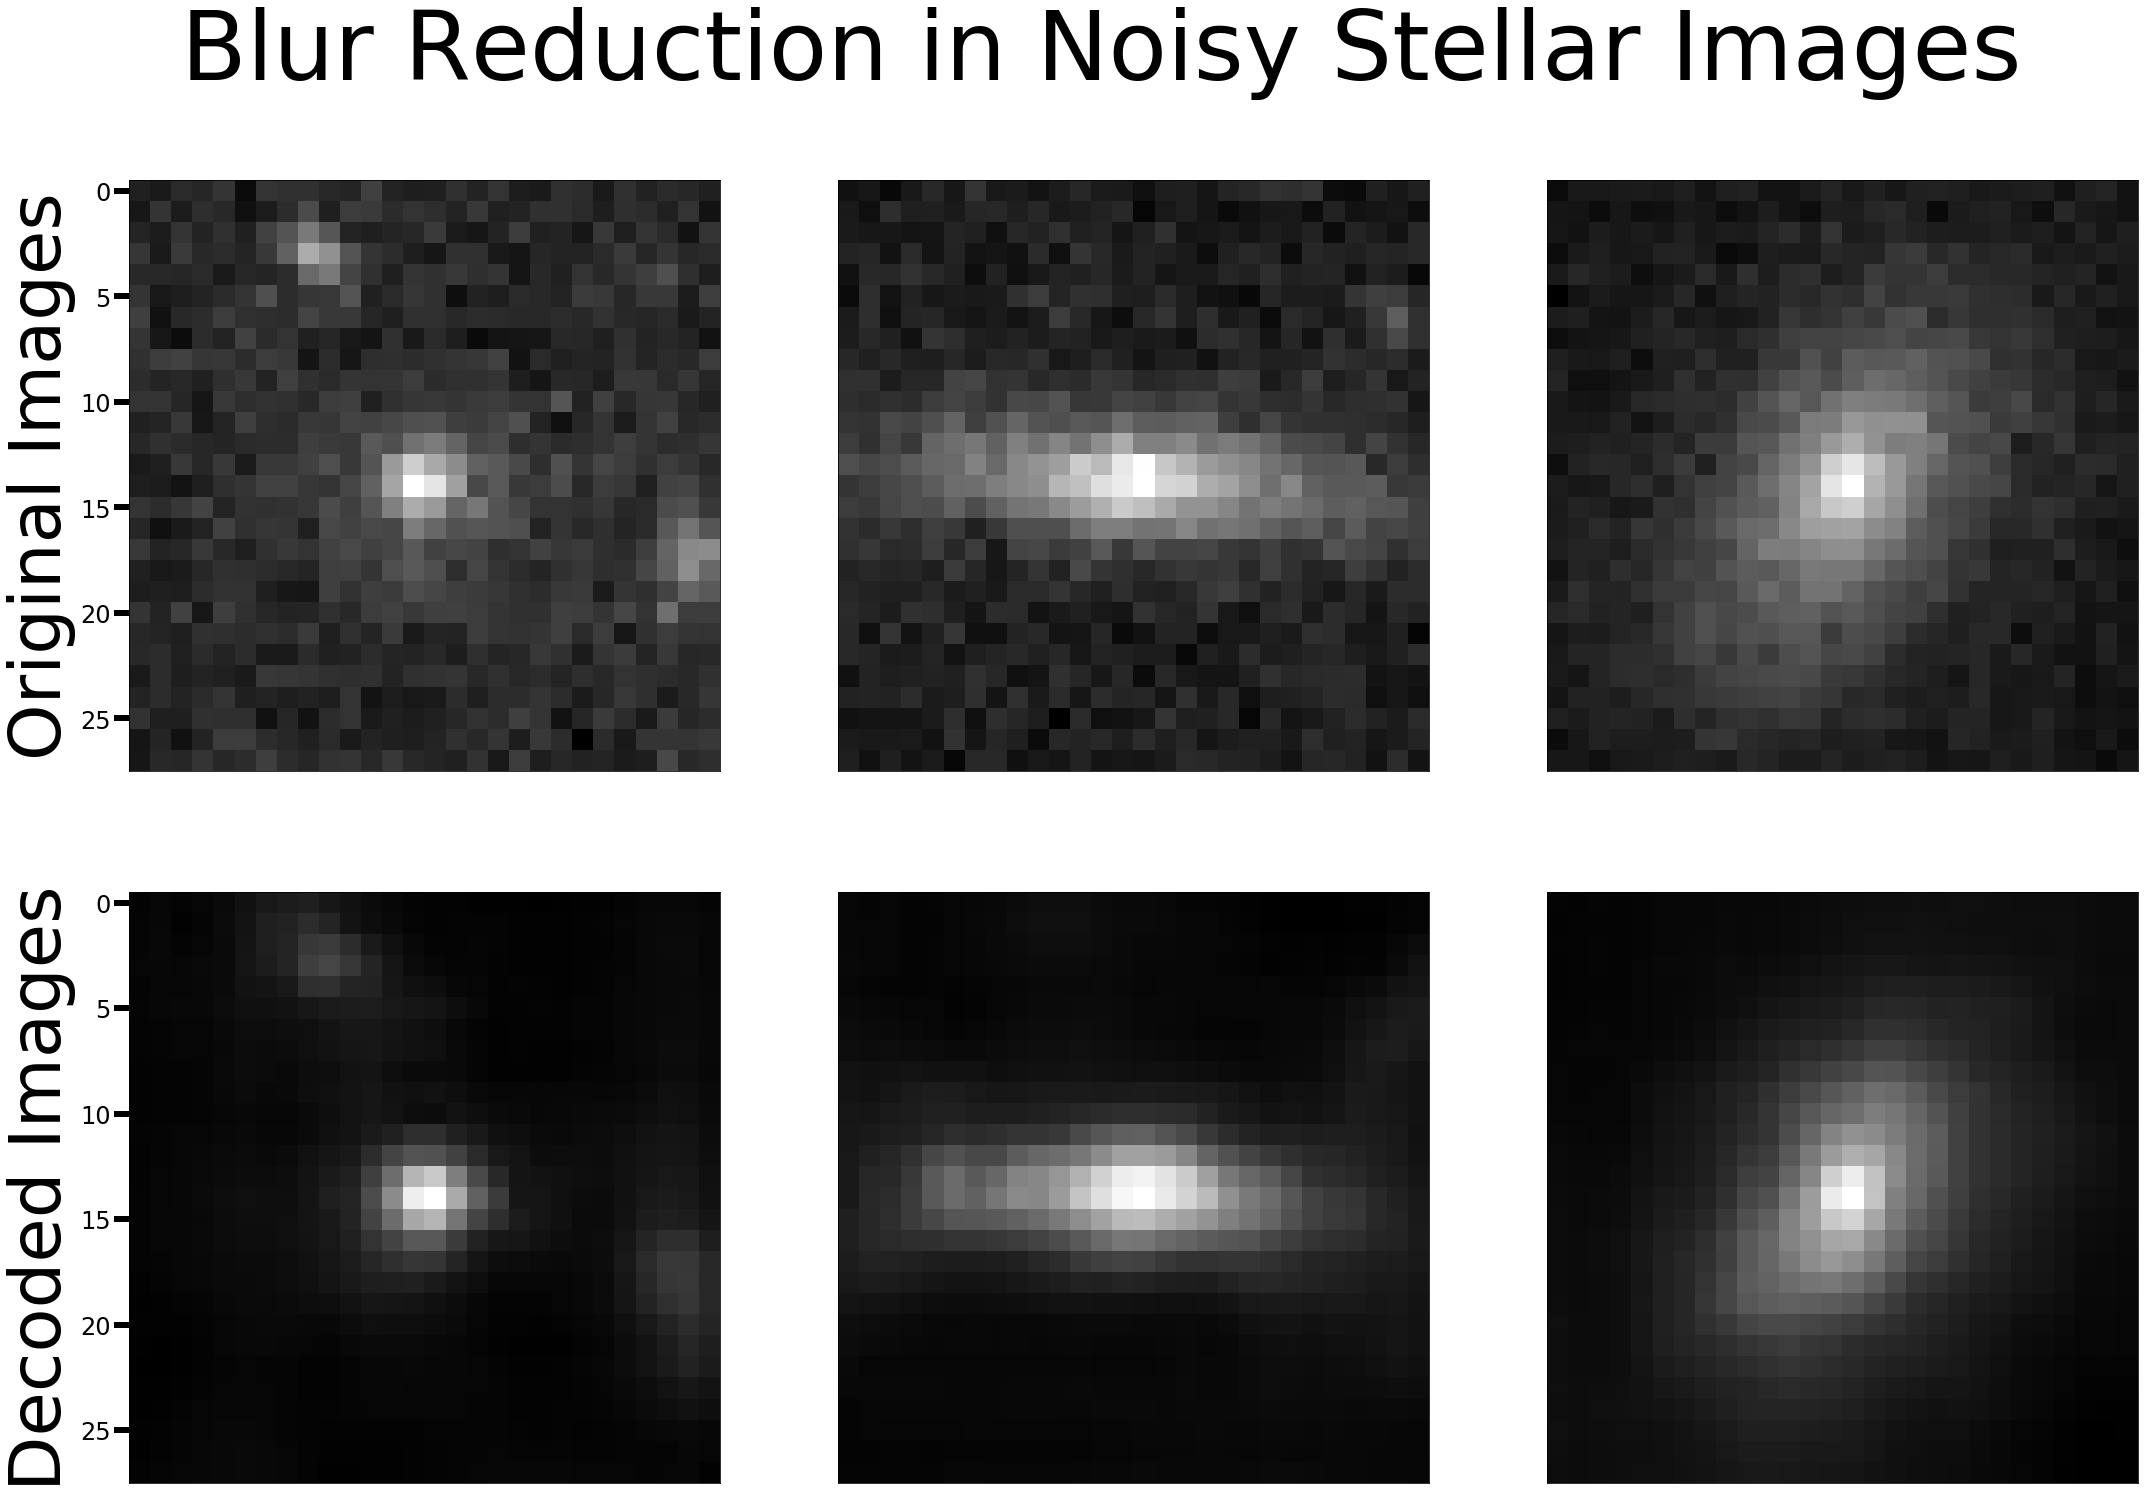

In [370]:
n = 3
x,y=(n*12,24)
plt.figure(figsize=(x, y))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.suptitle('Blur Reduction in Noisy Stellar Images',fontsize=y*4)
    plt.ylabel('Original Images',fontsize=y*3)
    plt.imshow(x_test[int(indxs[inxs[i]])].reshape(28, 28))
    plt.gray()
    ax.tick_params(direction='out', length=int(float(y)/1.6), width=int(float(y)/4),labelsize=y)
    ax.get_xaxis().set_visible(False)
    if i==0: ax.get_yaxis().set_visible(True)
    else: ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.ylabel('Decoded Images',fontsize=y*3)
    plt.imshow(decoded_imgs[int(indxs[inxs[i]])].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.tick_params(direction='out', length=int(float(y)/1.6), width=int(float(y)/4),labelsize=y)
    if i==0: ax.get_yaxis().set_visible(True)
    else: ax.get_yaxis().set_visible(False)
plt.savefig('blurs.png')
plt.show()

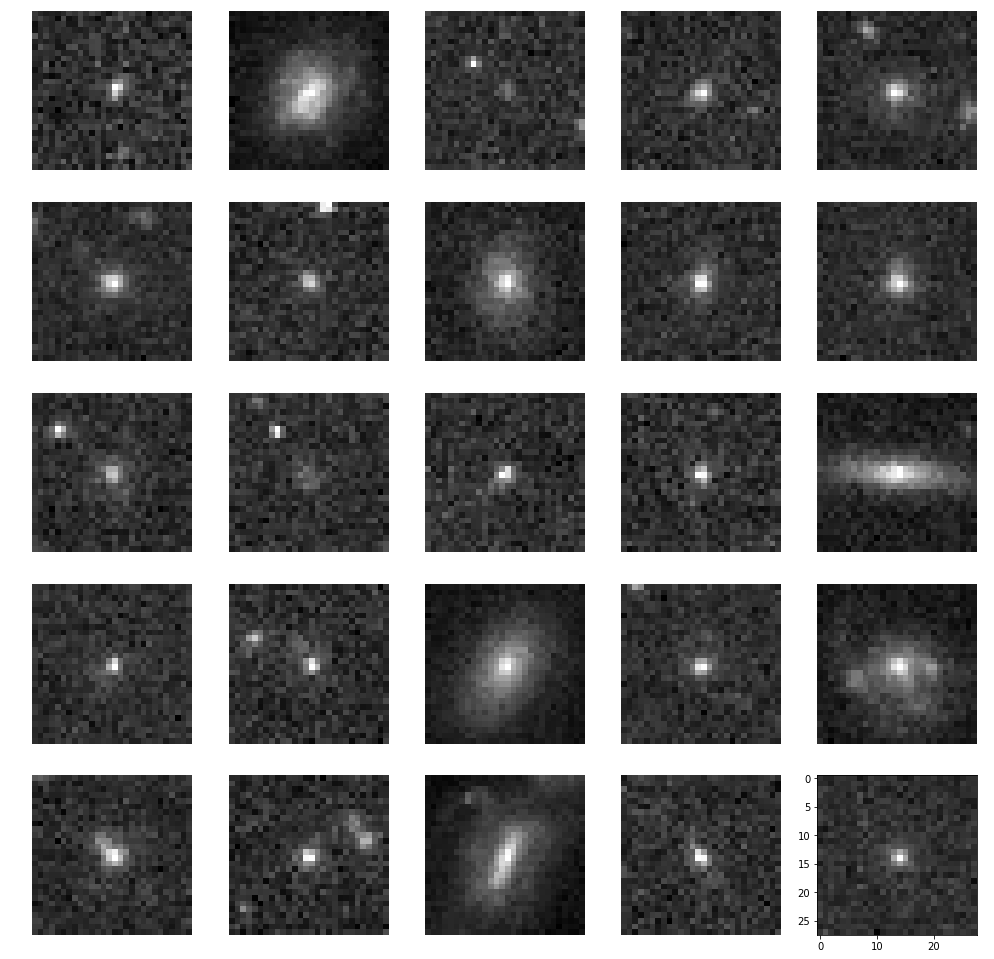

In [117]:
print_squares_images(imgs)

In [118]:
index=int(0)
for i in indxs:
    imgs[index]=decoded_imgs[int(i)].reshape(28,28)
    index+=1

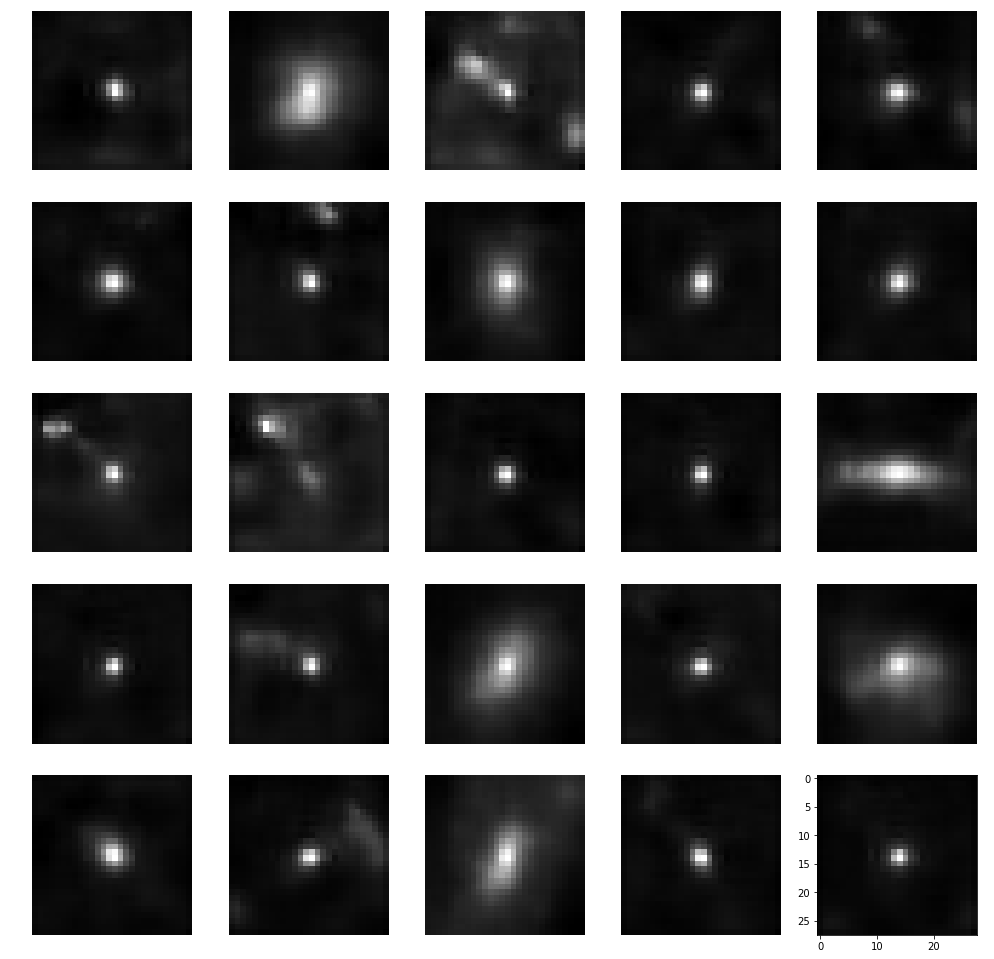

In [119]:
print_squares_images(imgs)

In [54]:
def pop_imgs(lower,opt):#,upper):
    for i in range(lower,lower+25):#upper):
        if opt==0:
            imgs[i-lower]=decoded_imgs[i].reshape(28,28)
        elif opt==1:
            imgs[i-lower]=x_test[i].reshape(28,28)

In [55]:
#print many images
#takes in array [n,w,h] of n images, where n is a square  
#prints images from array in a square pattern
#takes options for visualization
def print_squares_images(im_array):#,opt):
    fig = plt.figure(figsize=(17, 17))
    n=im_array.shape[0]
    for i in range(25):
        plt.axis('off')
        sub = fig.add_subplot(int(math.sqrt(n)), int(math.sqrt(n)), i + 1)
        sub.imshow(imgs[i,:,:], interpolation='nearest')
        #if opt=='check_center': sub.set_title(str(check_center(imgs[i])))
        #if opt=='avgs': sub.set_title(str(np.mean(imgs[i])))

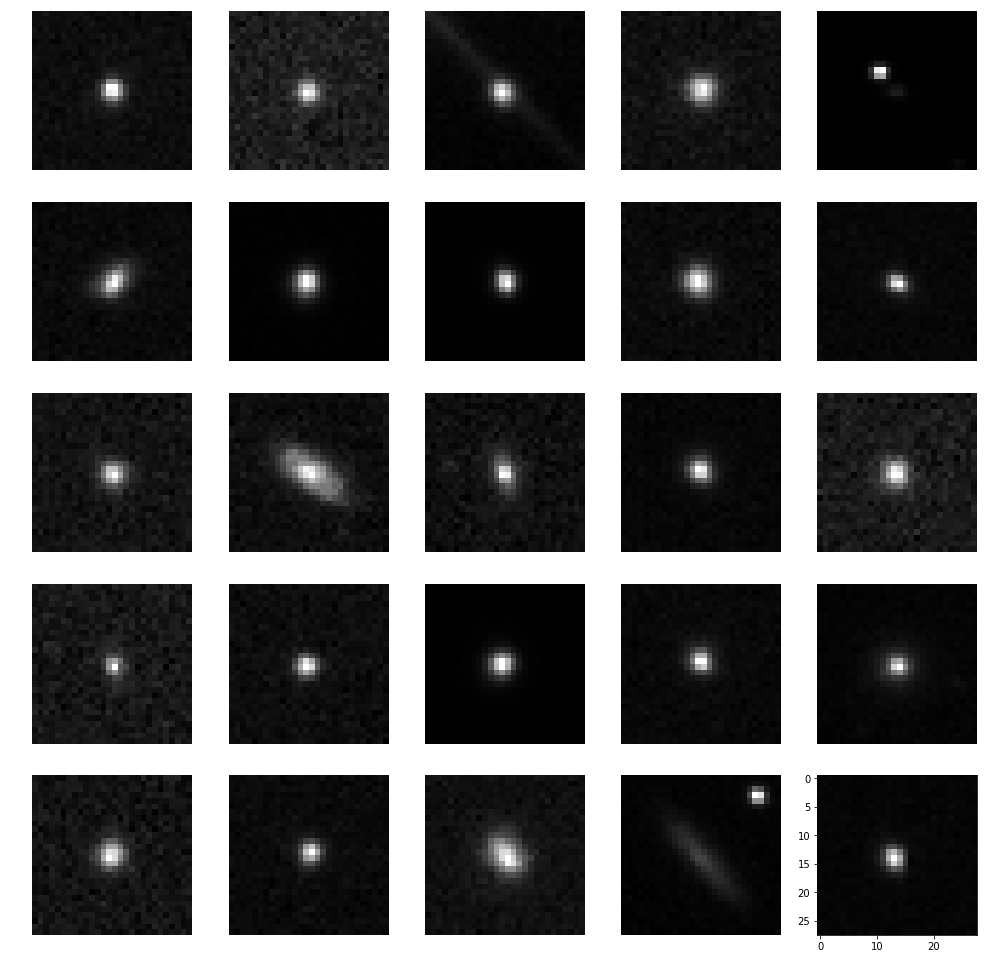

In [324]:
starty=8050
pop_imgs(starty,1)
print_squares_images(imgs)

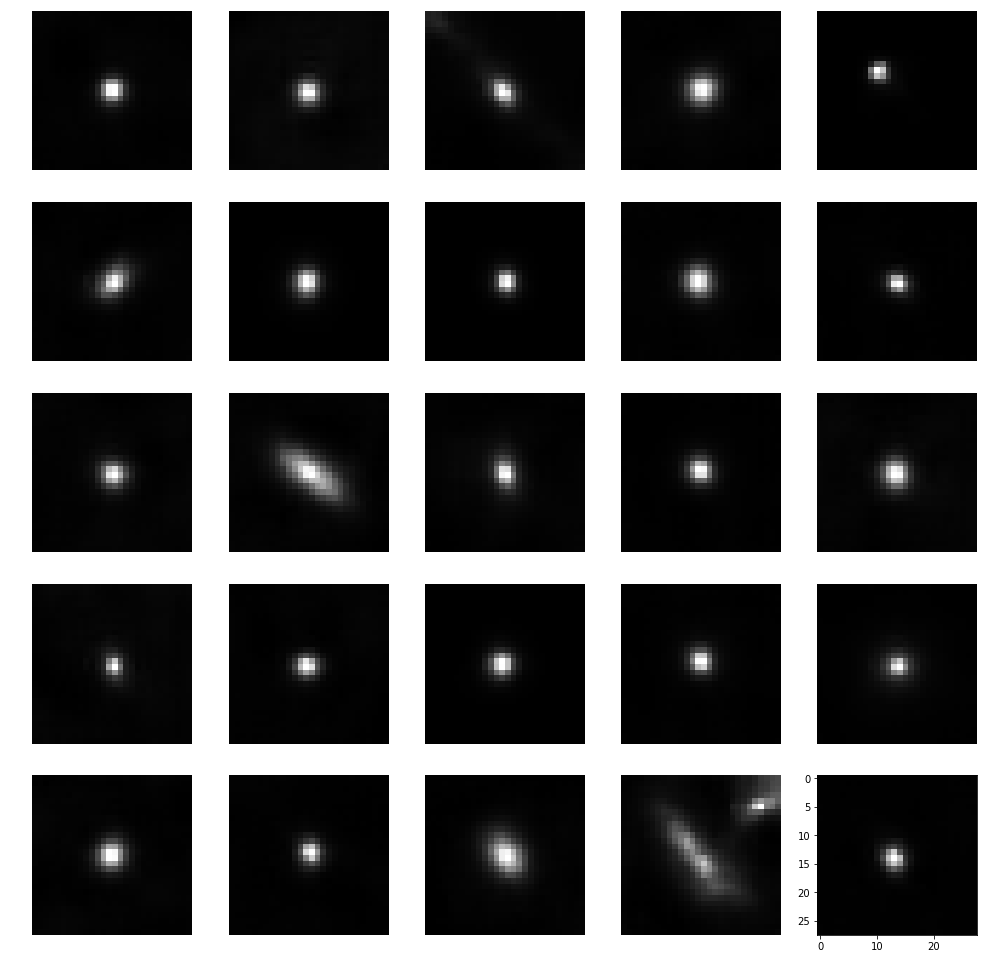

In [325]:
pop_imgs(starty,0)
print_squares_images(imgs)

In [346]:
inouts=np.array([1415,8011,1417,23,8022])

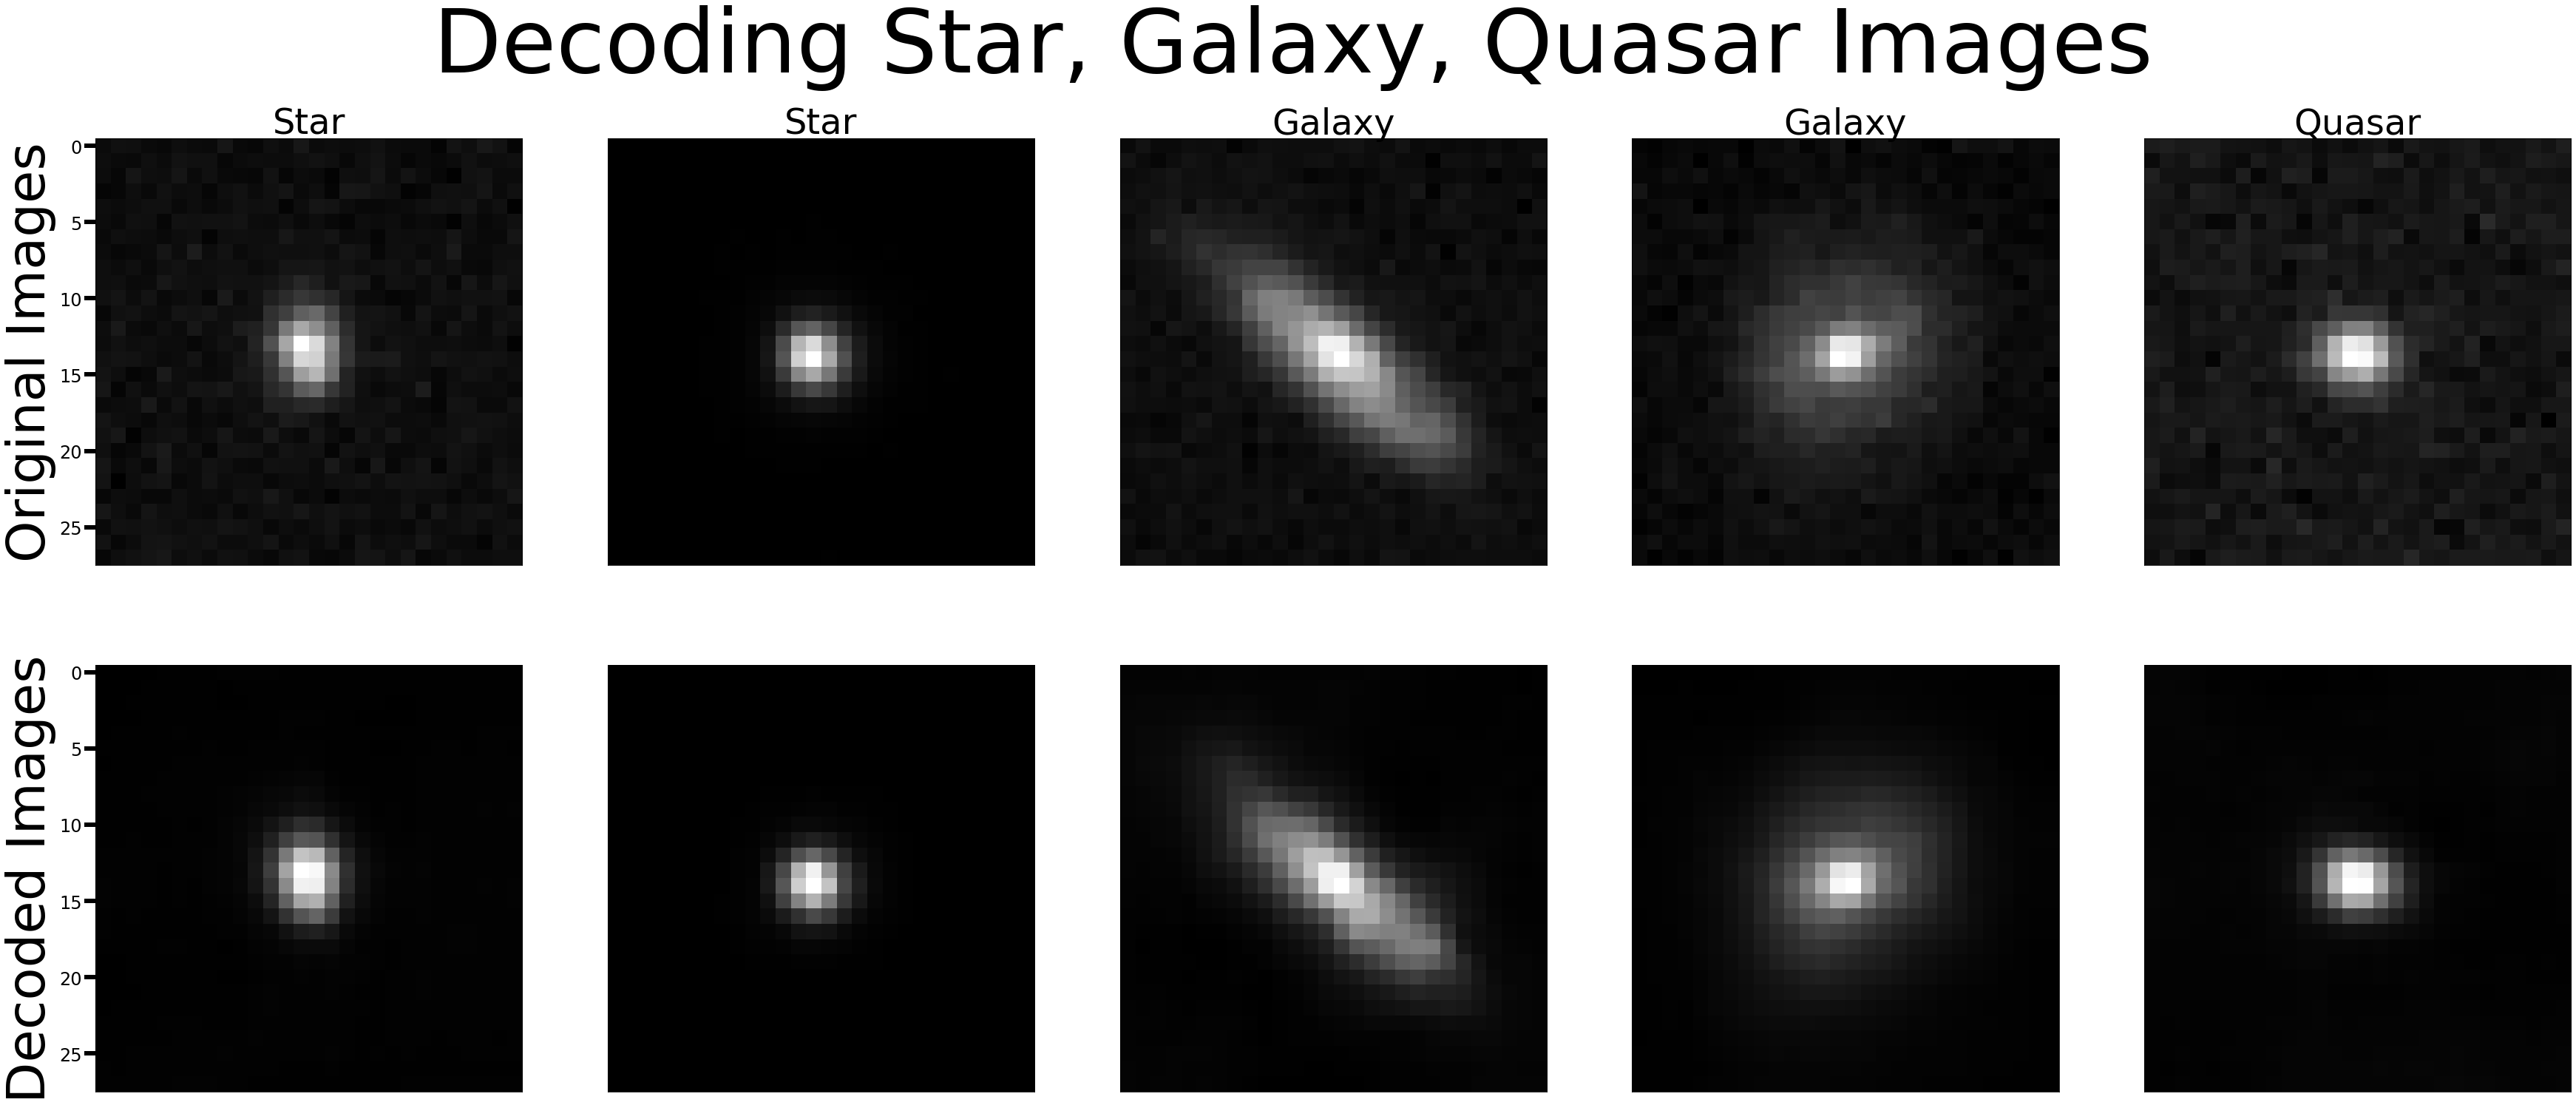

In [371]:
n = 5
x,y=(n*12,24)
plt.figure(figsize=(x, y))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.suptitle('Decoding Star, Galaxy, Quasar Images',fontsize=y*5)
    plt.ylabel('Original Images',fontsize=y*3)
    if i==1 or i==0: ax.set_title('Star', fontsize=y*2)
    if i==3 or i==2: ax.set_title('Galaxy', fontsize=y*2)
    if i==4: ax.set_title('Quasar', fontsize=y*2)
    plt.imshow(x_test[inouts[i]].reshape(28, 28))
    #plt.gray()
    ax.tick_params(direction='out', length=int(float(y)/1.6), width=int(float(y)/4),labelsize=y)
    ax.get_xaxis().set_visible(False)
    if i==0: ax.get_yaxis().set_visible(True)
    else: ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.ylabel('Decoded Images',fontsize=y*3)
    plt.imshow(decoded_imgs[inouts[i]].reshape(28, 28))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.tick_params(direction='out', length=int(float(y)/1.6), width=int(float(y)/4),labelsize=y)
    if i==0: ax.get_yaxis().set_visible(True)
    else: ax.get_yaxis().set_visible(False)
plt.savefig('inouts.png')
plt.show()

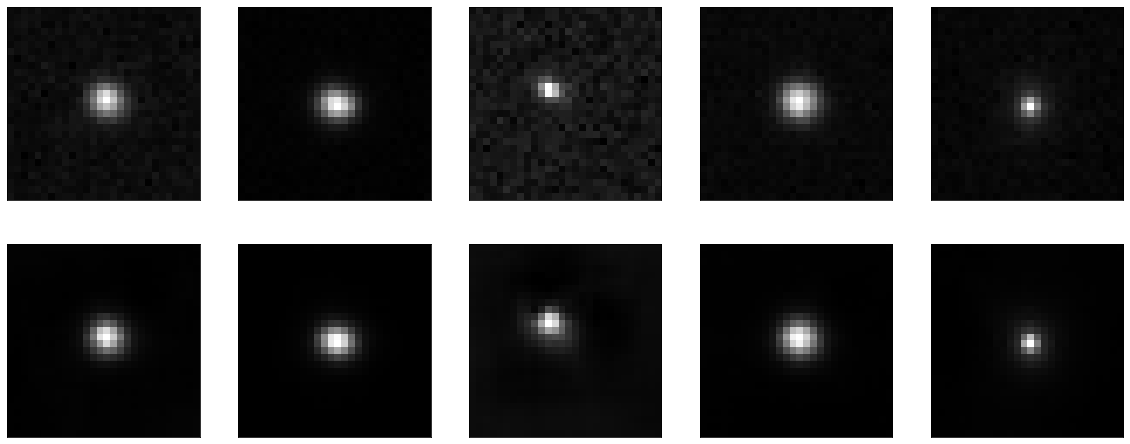

In [312]:
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
x_test[0].shape

(28, 28, 1)

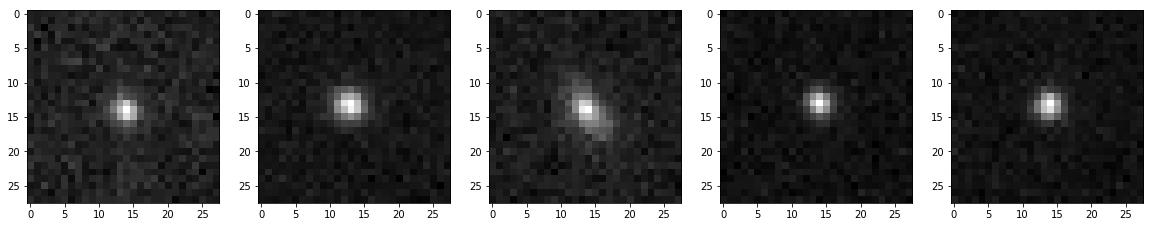

In [68]:
n=5
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28,28))

In [123]:
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy.wcs import WCS
from astropy import units as u
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [124]:
def get_obj_data(ra,dec):
        # Coordinates from SDSS SQL search
        objCoord=SkyCoord(ra=ra*u.degree,dec=dec*u.degree)
        # Get SDSS images
        xObj = SDSS.query_region(objCoord, spectro=True)
        imgObj = SDSS.get_images(matches=xObj)
        image_i = imgObj[0][0]
        data_i = image_i.data
        # Get image coordinates
        wcs = WCS(image_i.header)
        # Cut the Field of view 25.0 x 25.0 arcsec
        # this gives us 63x63 pixel image
        # nice size for galaxy, about twice and big as necessary for stars
        FoV = np.array([25.0, 25.0])
        FoV_dimen = u.Quantity((FoV[0], FoV[1]), u.arcsec)
        cutout = Cutout2D(data_i, objCoord, FoV_dimen, wcs=wcs)
        wcs_cut = cutout.wcs
        #ret=[]
        #for i in cutout.data.size: ret.append(cutout.data[i])
        #plot(objCoord,cutout)
        #print(cutout.data.size)
        return cutout.data.astype(float)

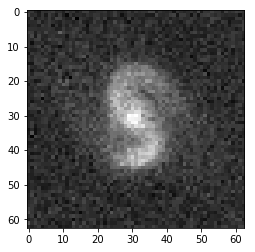

In [127]:
#object2 to get is random galaxy from SQL query
ra2=132.486292926937
dec2=51.1575638301083
data2=get_obj_data(ra2,dec2)
plt.imshow(data2.reshape(63,63))

In [128]:
def resize_63_to_28(img):
    #flip=rnd(0,1)
    start=4#2+flip
    reduced=np.empty([28,28])
    for i in range(28):
        for j in range(28):
            temp=img[(start+2*i-1):(start+2*i+1),(start+2*j-1):(start+2*j+1)]
            reduced[i,j]=np.mean(temp)
    return normalize_data(reduced)

In [130]:
#normalizing data to 0-1 scale
#normalizes one image and returns normalized image
def normalize_data(data):
    #normalize all data 
    data=(data-np.min(data))/(np.max(data)-np.min(data))
    return data

In [131]:
data2=resize_63_to_28(data2)

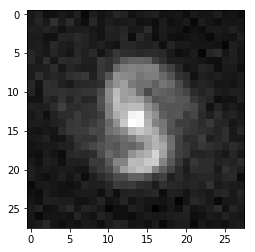

In [137]:
plt.imshow(data2.reshape(28,28))

In [140]:
data2=data2.reshape(1,28,28,1)

In [141]:
data2_predict=autoencoder.predict(data2)

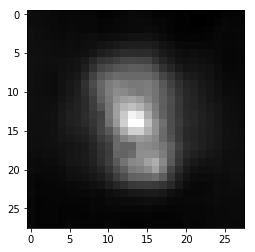

In [143]:
plt.imshow(data2_predict.reshape(28,28))

In [235]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
save_path_bh='../../data_exploration/dump/bh_reduced.jpg'
save_path_croc='../../old/classifier_testing/croc_reduced.png'

In [236]:
img = mpimg.imread(save_path_bh)     
bh = rgb2gray(img)

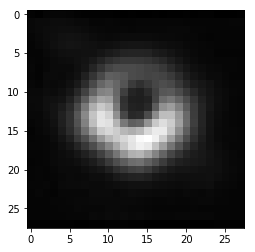

In [237]:
bh =normalize_data(bh)

plt.imshow(bh, cmap = plt.get_cmap('gray'))

In [238]:
bh=bh.reshape(1,28,28,1)

In [239]:
bh_predict=autoencoder.predict(bh)

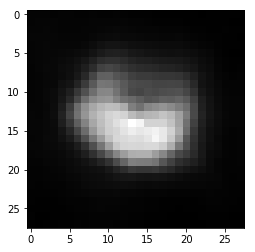

In [240]:
plt.imshow(bh_predict.reshape(28,28))

In [241]:
img = mpimg.imread(save_path_croc)     
croc = rgb2gray(img)

In [242]:
#inverting croc image to get 0.0 values where there is not data
for i in range(croc.shape[0]):
    for j in range(croc.shape[1]):
        croc[i,j]=1-croc[i,j]

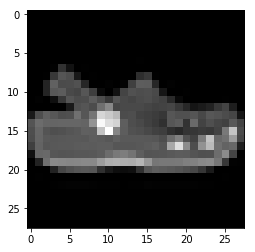

In [243]:
croc=normalize_data(croc)

plt.imshow(croc, cmap = plt.get_cmap('gray'))

In [244]:
croc=croc.reshape(1,28,28,1)

In [245]:
croc_predict=autoencoder.predict(croc)

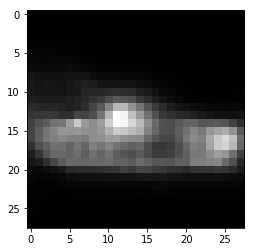

In [246]:
plt.imshow(croc_predict.reshape(28,28))

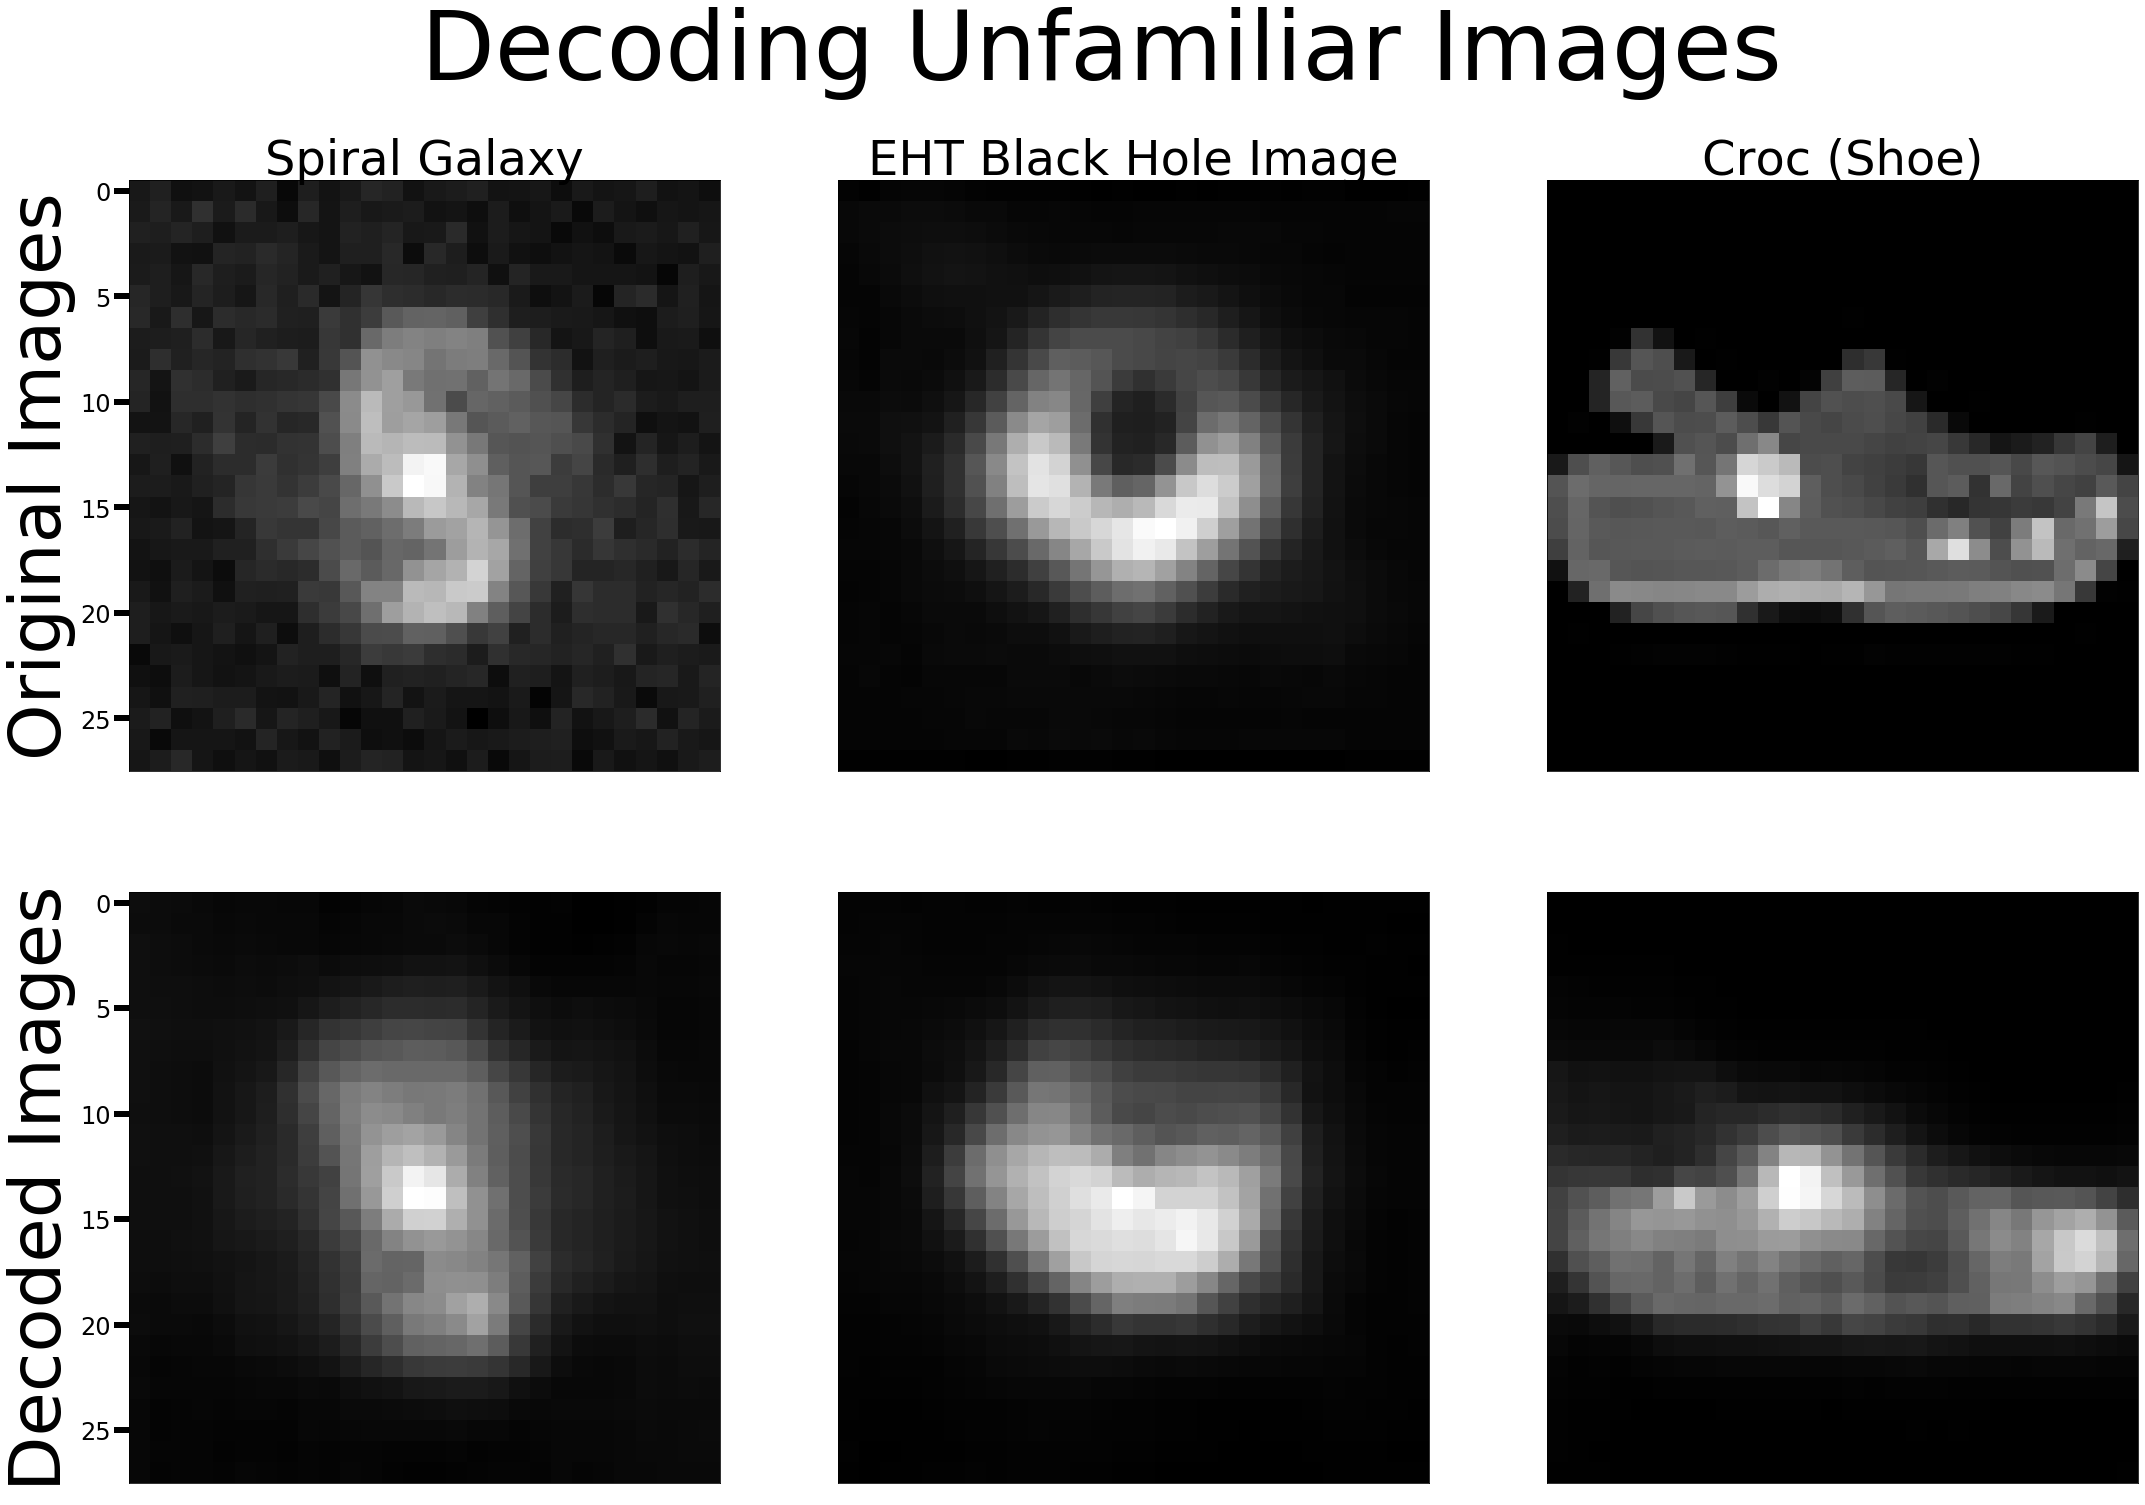

In [372]:
n = 3
x,y=(n*12,24)
plt.figure(figsize=(x, y))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.suptitle('Decoding Unfamiliar Images',fontsize=y*4)
    plt.ylabel('Original Images',fontsize=y*3)
    if i==0: 
        ax.set_title('Spiral Galaxy', fontsize=y*2)
        plt.imshow(data2.reshape(28,28))
    if i==1: 
        ax.set_title('EHT Black Hole Image', fontsize=y*2)
        plt.imshow(bh.reshape(28,28))
    if i==2: 
        ax.set_title('Croc (Shoe)', fontsize=y*2)
        plt.imshow(croc.reshape(28,28))
    plt.gray()
    ax.tick_params(direction='out', length=int(float(y)/1.6), width=int(float(y)/4),labelsize=y)
    ax.get_xaxis().set_visible(False)
    if i==0: ax.get_yaxis().set_visible(True)
    else: ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.ylabel('Decoded Images',fontsize=y*3)
    if i==0: 
        plt.imshow(data2_predict.reshape(28, 28))
    if i==1: 
        plt.imshow(bh_predict.reshape(28, 28))
    if i==2: 
        plt.imshow(croc_predict.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.tick_params(direction='out', length=int(float(y)/1.6), width=int(float(y)/4),labelsize=y)
    if i==0: ax.get_yaxis().set_visible(True)
    else: ax.get_yaxis().set_visible(False)
plt.savefig('anamolies.png')
plt.show()

In [378]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png',show_shapes=True)